In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import string
import plotly.graph_objects as go


#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
#import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

pd.set_option('max_rows',None)
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('../data/df_rs3.csv')
df0 = pd.read_csv('../data/fifa19.csv')

In [3]:
df0.iloc[:,[2,17]].head()

,Name,Skill Moves
0,L. Messi,4.0
1,Cristiano Ronaldo,5.0
2,Neymar Jr,5.0
3,De Gea,1.0
4,K. De Bruyne,4.0


In [4]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Main Position
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,ST
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,1,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,ST
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,1,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,WING
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,GK
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,1,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,CM


In [5]:
df.iloc[:,14].head()
#dataframe.iloc[:,14] = Encoder.fit_transform(dataframe.iloc[:,14].astype(str))

0      Lean
1    Stocky
2      Lean
3      Lean
4    Normal
Name: Body Type, dtype: object

In [3]:
df1 = df[['Name', 'Age', 'Nationality', 'Club']]

In [7]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Main Position'],
      dtype='object')

In [7]:
df.iloc[:,[13]].head()

,Work Rate
0,Medium/ Medium
1,High/ Low
2,High/ Medium
3,Medium/ Medium
4,High/ High


In [9]:
df.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [8]:
#workrate = df['Work Rate'].str.get_dummies(sep='/ ')

In [5]:
main_position = df['Main Position'].str.get_dummies()
#position = df['Position'].str.get_dummies()
#workrate = df['Work Rate'].str.get_dummies(sep='/ ')
#work_rate = df['Work Rate'].str.get_dummies()

In [6]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Main Position'],
      dtype='object')

In [6]:
df2 = df[['Overall', 'Potential', 'Value', 'Wage', 'Preferred Foot', 'International Reputation',
      'Contract Valid Until', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
      'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]

In [6]:
#df2 = df[['Skill Moves','Preferred Foot', 'Wage', 'Value', 'International Reputation', 'Overall', 'Potential', 'Reactions', 'Composure', 'Vision',
 #        'ShortPassing', 'Skill Moves', 'BallControl', 'LongPassing', 'Volleys', 'Curve', 'ShotPower',
  #       'LongShots', 'Dribbling', 'FKAccuracy', 'Positioning', 'Finishing', 'Crossing', 'Penalties', 
   #       'Contract Valid Until', 'Stamina']]

In [7]:
#df = pd.concat([df1, main_position], axis =1)
#df = pd.concat([df1, position], axis =1)
#df = pd.concat([df, work_rate], axis =1)
#df = pd.concat([df, df2], axis =1)

df_x = pd.concat([df2, main_position], axis =1)

In [8]:
#df.head().T

In [9]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Main Position'],
      dtype='object')

In [16]:
#df0.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,39,40,41,42,43,44]].head().T

In [10]:
df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,
          24,25,26,45]].head().T

,0,1,2,3,4
Overall,94.0,94.0,92.0,91.0,91.0
Potential,94.0,94.0,93.0,93.0,92.0
Value,110500000.0,77000000.0,118500000.0,72000000.0,102000000.0
Wage,565000.0,405000.0,290000.0,260000.0,355000.0
Preferred Foot,0.0,1.0,1.0,1.0,1.0
International Reputation,5.0,5.0,5.0,4.0,4.0
Contract Valid Until,2021.0,2022.0,2022.0,2020.0,2023.0
Crossing,84.0,84.0,79.0,17.0,93.0
Finishing,95.0,94.0,87.0,13.0,82.0
HeadingAccuracy,70.0,89.0,62.0,21.0,55.0


In [31]:
#df0.dtypes
# 0 2 3

In [18]:
df.shape

(18207, 81)

In [17]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Club', 'CAM', 'CB', 'CDM', 'CF', 'CM',
       'GK', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST',
       'High', 'Low', 'Medium', 'Overall', 'Potential', 'Value', 'Wage',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Contract Valid Until', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Main Position'],
      dty

In [26]:
df.iloc[:,[31,33]].head()

,High,Medium
0,0,1
1,1,0
2,1,1
3,0,1
4,1,0


In [13]:
df.iloc[:,[1,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,
          24,25,26,45]].head().T

,0,1,2,3,4
Age,31.0,33.0,26.0,27.0,27.0
AM,0.0,0.0,0.0,0.0,0.0
CB,0.0,0.0,0.0,0.0,0.0
CDM,0.0,0.0,0.0,0.0,0.0
CM,0.0,0.0,0.0,0.0,1.0
FB,0.0,0.0,0.0,0.0,0.0
GK,0.0,0.0,0.0,1.0,0.0
ST,1.0,1.0,0.0,0.0,0.0
WING,0.0,0.0,1.0,0.0,0.0
High/ High,0.0,0.0,0.0,0.0,1.0


In [10]:
df.columns

Index(['Skill Moves', 'Preferred Foot', 'Wage', 'Value',
       'International Reputation', 'Overall', 'Potential', 'Reactions',
       'Composure', 'Vision', 'ShortPassing', 'Skill Moves', 'BallControl',
       'LongPassing', 'Volleys', 'Curve', 'ShotPower', 'LongShots',
       'Dribbling', 'FKAccuracy', 'Positioning', 'Finishing', 'Crossing',
       'Penalties', 'Contract Valid Until', 'Stamina', 'AM', 'CB', 'CDM', 'CM',
       'FB', 'GK', 'ST', 'WING'],
      dtype='object')

In [10]:
#scaler = StandardScaler()
#scaler.fit_transform(df.iloc[:,4:81])

scaler = StandardScaler()
scaler.fit_transform(df.iloc[:,[1,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,
          24,25,26,45]])

array([[ 1.25867833, -0.24107236, -0.45193618, ...,  9.80625084,
         4.01828714,  0.67453002],
       [ 1.68696087, -0.24107236, -0.45193618, ...,  9.80625084,
         4.01828714,  1.44853696],
       [ 0.18797198, -0.24107236, -0.45193618, ...,  9.80625084,
         3.72879875,  1.44853696],
       ...,
       [-1.95344072, -0.24107236, -0.45193618, ..., -0.29173056,
        -2.78469008,  0.67453002],
       [-1.73929945, -0.24107236, -0.45193618, ..., -0.29173056,
        -2.78469008, -0.87348386],
       [-1.95344072, -0.24107236, -0.45193618, ..., -0.29173056,
        -2.92943428, -0.87348386]])

In [10]:
#X = df.iloc[:,[1,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,
  #        24,25,26,45]]
X = df_x.iloc[:,1:]
df1 = df

In [11]:
df.iloc[:,0].head()

0    158023
1     20801
2    190871
3    193080
4    192985
Name: ID, dtype: int64

In [20]:
pca = PCA(n_components=2)
pca.fit_transform(X)
X = pca.transform(X)
x = pd.DataFrame(X)
explained_var = pca.explained_variance_ratio_
Names = df.iloc[:,1]
names = pd.DataFrame(Names)
dataframe = pd.concat([names, x], axis =1)
recommendations = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(X)
player_indices = recommendations.kneighbors(X)[1]

In [21]:
explained_var

array([9.99995933e-01, 4.06724393e-06])

In [22]:
#df.head()
#names.head()
#df.iloc[:,1]

In [23]:
def get_index(x):
    return dataframe[dataframe['Name']==x].index.tolist()[0]

def recommend_me(player):
    print('Here are 5 players similar to', player, ':' '\n')
    index = get_index(player)
    for i in player_indices[index][1:]:
            print(dataframe.iloc[i]['Name'], '\n')

In [24]:
recommend_me("T. Courtois")

Here are 5 players similar to T. Courtois :

Marco Asensio 

Roberto Firmino 

S. Mané 

M. Verratti 

C. Immobile 



In [25]:
recommend_me("L. Messi")

Here are 5 players similar to L. Messi :

Neymar Jr 

K. De Bruyne 

E. Hazard 

P. Dybala 

H. Kane 



In [26]:
recommend_me("Isco")

Here are 5 players similar to Isco :

C. Eriksen 

De Gea 

T. Kroos 

Cristiano Ronaldo 

R. Lewandowski 



In [27]:
recommend_me("M. de Ligt")

Here are 5 players similar to M. de Ligt :

Danilo Pereira 

M. Götze 

M. Rashford 

B. Leno 

Lucas Vázquez 



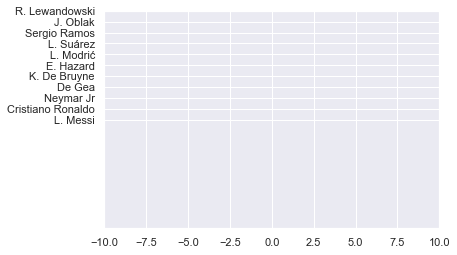

In [28]:
#We can plot a graph between these two parameters, to show the divergence in these two dimensions:
x = df.iloc[:,0]
y = df.iloc[:,1]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x,y, color='blue', marker='.')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
plt.show()

In [7]:
#workrate = dataframe['Work Rate'].str.get_dummies(sep='/ ')
#df['Work Rate'].head()
#workrate = df['Work Rate'].str.get_dummies(sep='/ ')
#workrate.head()

,High,Low,Medium
0,0,0,1
1,1,1,0
2,1,0,1
3,0,0,1
4,1,0,0


In [6]:
#position = df['Position'].str.get_dummies(sep='/ ')
#position.head().T

,0,1,2,3,4
CAM,0,0,0,0,0
CB,0,0,0,0,0
CDM,0,0,0,0,0
CF,0,0,0,0,0
CM,0,0,0,0,0
GK,0,0,0,1,0
LAM,0,0,0,0,0
LB,0,0,0,0,0
LCB,0,0,0,0,0
LCM,0,0,0,0,0


In [8]:
df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,39,40,41,42,43,44]].head().T
#everything but stats

#df.iloc[:,1:].head()

,0,1,2,3,4
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne
Age,31,33,26,27,27
Nationality,Argentina,Portugal,Brazil,Spain,Belgium
Overall,94,94,92,91,91
Potential,94,94,93,93,92
Club,FC Barcelona,Juventus,Paris Saint-Germain,Manchester United,Manchester City
Value,1.105e+08,7.7e+07,1.185e+08,7.2e+07,1.02e+08
Wage,565000,405000,290000,260000,355000
Preferred Foot,0,1,1,1,1
International Reputation,5,5,5,4,4


In [18]:
df.iloc[:, [55,59,63,64,65,69,71,72,76,77]].head().T

,0,1,2,3,4
Finishing,95.0,94.0,87.0,13.0,82.0
Dribbling,97.0,88.0,96.0,18.0,86.0
BallControl,96.0,94.0,95.0,42.0,91.0
Acceleration,91.0,89.0,94.0,57.0,78.0
SprintSpeed,86.0,91.0,90.0,58.0,76.0
ShotPower,85.0,95.0,80.0,31.0,91.0
Stamina,72.0,88.0,81.0,43.0,90.0
Strength,59.0,79.0,49.0,64.0,75.0
Positioning,94.0,95.0,89.0,12.0,87.0
Vision,94.0,82.0,87.0,68.0,94.0


In [19]:
df.iloc[:,[83,86,87,80,81,75]].head()

,GKDiving,GKPositioning,GKReflexes,Marking,StandingTackle,Interceptions
0,6.0,14.0,8.0,33.0,28.0,22.0
1,7.0,14.0,11.0,28.0,31.0,29.0
2,9.0,15.0,11.0,27.0,24.0,36.0
3,90.0,88.0,94.0,15.0,21.0,30.0
4,15.0,10.0,13.0,68.0,58.0,61.0


In [20]:
df.iloc[:,68:80].head()

,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure
0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0
1,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0
2,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0
3,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0
4,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0


In [21]:
df.iloc[:,[2,17]].head()

,Name,Skill Moves
0,L. Messi,4.0
1,Cristiano Ronaldo,5.0
2,Neymar Jr,5.0
3,De Gea,1.0
4,K. De Bruyne,4.0


In [23]:
scaler = StandardScaler()
scaler.fit_transform(dataframe.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,39,40,41,42,43,44]])

X = dataframe.iloc[:,1:]
df1 = dataframe

#df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,39,40,41,42,43,44]].head().T
#everything but stats

,0,1,2,3,4
ID,158023,20801,190871,193080,192985
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne
Age,31,33,26,27,27
Photo,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/players/4/19/192985.png
Nationality,Argentina,Portugal,Brazil,Spain,Belgium
Flag,https://cdn.sofifa.org/flags/52.png,https://cdn.sofifa.org/flags/38.png,https://cdn.sofifa.org/flags/54.png,https://cdn.sofifa.org/flags/45.png,https://cdn.sofifa.org/flags/7.png
Overall,94,94,92,91,91
Potential,94,94,93,93,92
Club,FC Barcelona,Juventus,Paris Saint-Germain,Manchester United,Manchester City
Club Logo,https://cdn.sofifa.org/teams/2/light/241.png,https://cdn.sofifa.org/teams/2/light/45.png,https://cdn.sofifa.org/teams/2/light/73.png,https://cdn.sofifa.org/teams/2/light/11.png,https://cdn.sofifa.org/teams/2/light/10.png
